In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('./data/filtered_cve_data.csv')
data

,CVE_ID,Description,Device,Product,Vendor,Version,Firmware,Patch Availability,Reserved Date,Published Date,Update Date,Problem Type,EPSS_Score,CVSS_Score,Severity,Vector,Exploitability Score,Impact Score,Score Source,references
0,CVE-2009-3564,puppetmasterd in puppet 0.24.6 does not reset ...,Switch,NaN,NaN,NaN,NaN,NaN,2009-10-05T00:00:00,2009-10-06T17:22:00,2024-08-07T06:31:10.575Z,CWE-264,0.04%,4.7,MEDIUM,AV:L/AC:M/Au:N/C:C/I:N/A:N,3.4,6.9,NIST,"https://puppet.com/security/cve/cve-2009-3564,..."
1,CVE-2009-3341,Buffer overflow on the Linksys WRT54GL wireles...,Router,NaN,NaN,NaN,NaN,NaN,2009-09-24T00:00:00Z,2009-09-24T16:00:00Z,2024-09-17T03:03:10.465Z,CWE-119 Improper Restriction of Operations wit...,3.66%,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,10.0,10.0,NIST,"http://www.securitytracker.com/id?1022827, htt..."
2,CVE-2009-3962,The management interface on the 2wire Gateway ...,Router,NaN,NaN,NaN,NaN,NaN,2009-11-17T00:00:00,2009-11-17T18:00:00,2024-08-07T06:45:50.747Z,CWE-20 Improper Input Validation,1.75%,7.8,HIGH,AV:N/AC:L/Au:N/C:N/I:N/A:C,10.0,6.9,NIST,http://www.securityfocus.com/archive/1/507587/...
3,CVE-2009-3828,The web interface for Everfocus EDR1600 DVR al...,NVR,NaN,NaN,NaN,NaN,NaN,2009-10-30T00:00:00,2009-10-30T19:00:00,2024-08-07T06:38:30.497Z,CWE-287 Improper Authentication,1.86%,5.0,MEDIUM,AV:N/AC:L/Au:N/C:P/I:N/A:N,10.0,2.9,NIST,http://www.securityfocus.com/archive/1/507373/...
4,CVE-2009-3322,The Siemens Gigaset SE361 WLAN router allows r...,Router,NaN,NaN,NaN,NaN,NaN,2009-09-23T00:00:00,2009-09-23T10:00:00,2024-08-07T06:22:24.435Z,NaN,13.58%,7.8,HIGH,AV:N/AC:L/Au:N/C:N/I:N/A:C,10.0,6.9,NIST,http://www.securityfocus.com/archive/1/506414/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,CVE-2024-23910,Cross-site request forgery (CSRF) vulnerabilit...,Router,WRC-1167GS2-B,"ELECOM CO.,LTD.",v1.67 and earlier,NaN,NaN,2024-02-15T01:25:06.163Z,2024-02-28T23:07:02.324Z,2024-09-09T06:36:00.982Z,NaN,0.04%,8.8,HIGH,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,2.8,5.9,134c704f-9b21-4f2e-91b3-4a467353bcc0,https://www.elecom.co.jp/news/security/2024022...
7399,CVE-2024-23727,The YI Smart Kami Vision com.kamivision.yismar...,Camera,NaN,NaN,NaN,NaN,NaN,2024-01-21T00:00:00,2024-03-28T00:00:00,2024-08-27T19:12:26.981Z,CWE-94 Improper Control of Generation of Code ...,0.04%,8.4,HIGH,CVSS:3.1/AV:L/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,2.5,5.9,134c704f-9b21-4f2e-91b3-4a467353bcc0,https://github.com/actuator/yi/blob/main/com.k...
7400,CVE-2024-23842,Improper Input Validation in Hitron Systems DV...,NVR,DVR LGUVR-16H,Hitron Systems DVR,1.02,NaN,NaN,2024-01-23T04:53:48.120Z,2024-01-23T04:56:41.242Z,2024-10-22T03:55:45.527Z,"CWE-20 Improper Input Validation, CWE-798 Use ...",0.05%,"7.5, 7.4","HIGH, HIGH","CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H, ...","3.9, 2.8","3.6, 4.0","NIST, KrCERT/CC",http://www.hitron.co.kr/firmware/
7401,CVE-2024-23614,A buffer overflow vulnerability exists in Syma...,Router,Messaging Gateway,Symantec,0,['Linux'],NaN,2024-01-18T21:37:15.392Z,2024-01-25T23:32:21.154Z,2024-09-05T18:28:07.954Z,CWE-119 Improper Restriction of Operations wit...,0.21%,"9.4, 10.0, 9.8","HIGH, CRITICAL, CRITICAL","AV:N/AC:L/Au:N/C:C/I:C/A:N, CVSS:3.1/AV:N/AC:L...","10.0, 3.9, 3.9","9.2, 5.8, 5.9","Exodus Intelligence, Exodus Intelligence, NIST",https://blog.exodusintel.com/2024/01/25/symant...


In [3]:
# Group by the 'Device' column and count occurrences
device_data = data.groupby('Device').size().reset_index(name='count')

# Display the resulting DataFrame
device_data


,Device,count
0,Camera,1027
1,NVR,217
2,Router,4603
3,Switch,1556


/tmp/ipykernel_30407/3636348735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_data, x='Device', y='count', palette='tab10')


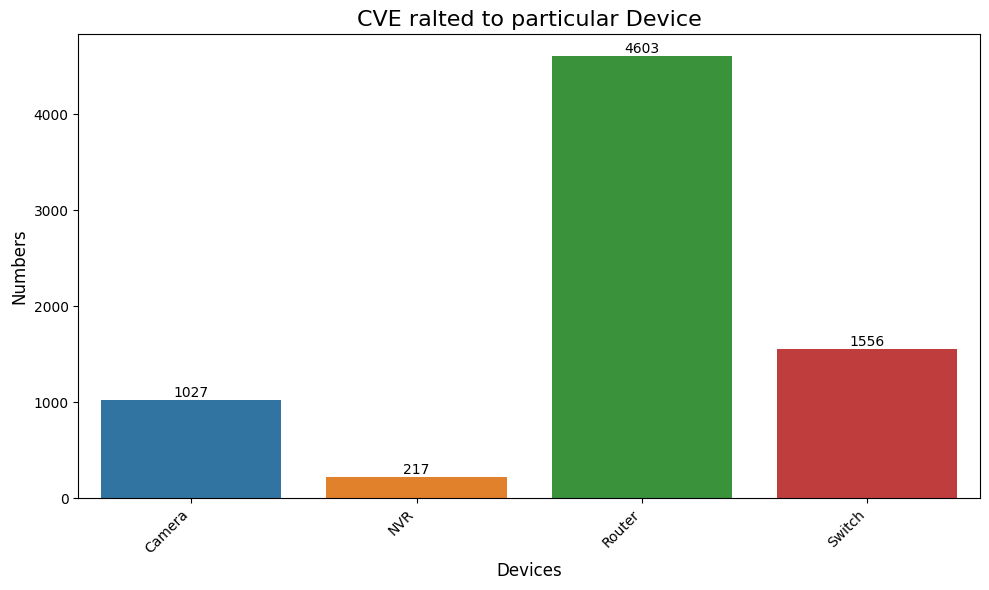

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=device_data, x='Device', y='count', palette='tab10')

# Annotate each bar with its total count
for index, row in device_data.iterrows():
    plt.text(index, row['count'], str(row['count']), ha='center', va='bottom')

# Customize the plot
plt.title('CVE ralted to particular Device', fontsize=16)
plt.xlabel('Devices', fontsize=12)
plt.ylabel('Numbers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


In [5]:
# Group by 'Year' and 'MainType' to calculate the number of CVEs
data['Year'] = data['Published Date'].str[:4]
data['Year']

0       2009
1       2009
2       2009
3       2009
4       2009
        ... 
7398    2024
7399    2024
7400    2024
7401    2024
7402    2024
Name: Year, Length: 7403, dtype: object

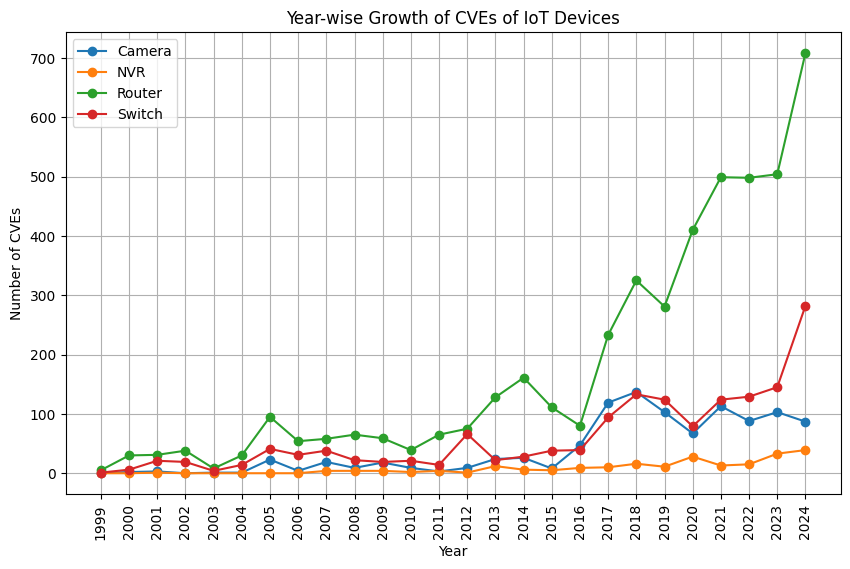

In [6]:
 
cve_counts_by_year = data.groupby(['Year', 'Device']).size().reset_index(name='CVE_Count')

# Pivot the data to create a table with 'Year' as index and 'MainType' as columns
cve_counts_pivot = cve_counts_by_year.pivot(index='Year', columns='Device', values='CVE_Count').fillna(0)

# Plot the results
plt.figure(figsize=(10, 6))

for main_type in cve_counts_pivot.columns:
    plt.plot(cve_counts_pivot.index, cve_counts_pivot[main_type], marker='o', label=main_type)

# Add plot labels and title
plt.title("Year-wise Growth of CVEs of IoT Devices")
plt.xlabel("Year")
plt.ylabel("Number of CVEs")
plt.xticks(rotation=90)  # Rotate the years on x-axis for better readability
plt.legend()
plt.grid(True)
plt.show()

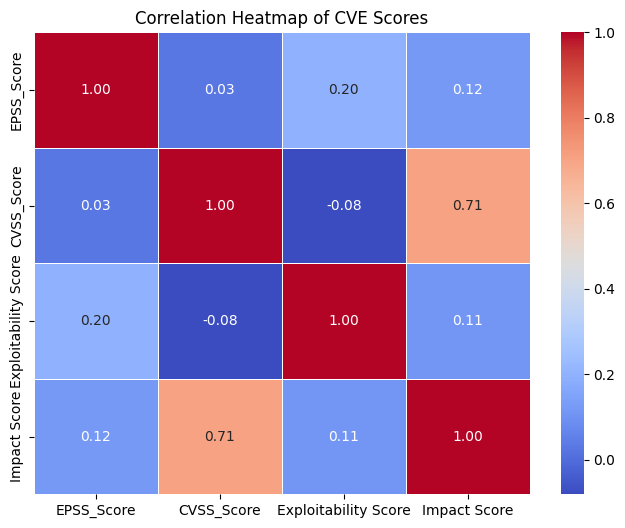

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert scores to numeric, handling percentages and missing values
data['EPSS_Score'] = data['EPSS_Score'].str.rstrip('%').astype(float, errors='ignore')  # Convert to float
data['CVSS_Score'] = pd.to_numeric(data['CVSS_Score'], errors='coerce')
data['Exploitability Score'] = pd.to_numeric(data['Exploitability Score'], errors='coerce')
data['Impact Score'] = pd.to_numeric(data['Impact Score'], errors='coerce')

# Select relevant columns for the heat map
heatmap_data = data[['EPSS_Score', 'CVSS_Score', 'Exploitability Score', 'Impact Score']].dropna()

# Create a heat map of correlations between these columns
correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of CVE Scores")
plt.show()


In [8]:
df=pd.read_csv('/home/ankit/Desktop/projects/CFTs/Code-Generator/data/exploits_filtered.csv')
df.head()

,date,exploit_link,description,category,platform,author,title,platform_detail
0,2023-03-29,https://www.exploit-db.com/download/51130,Uniview NVR301-04S2-P4 - Reflected Cross-Site ...,WebApps,Hardware,Bleron Rrustemi,Exploit Database,NaN
1,2022-02-16,https://www.exploit-db.com/download/50744,Network Video Recorder NVR304-16EP - Reflected...,WebApps,Hardware,Luis Martínez,Exploit Database,NaN
2,2021-01-04,https://www.exploit-db.com/download/49348,Arteco Web Client DVR/NVR - 'SessionId' Brute ...,WebApps,Windows,LiquidWorm,Exploit Database,NaN
3,2020-09-10,https://www.exploit-db.com/download/48799,Tiandy IPC and NVR 9.12.7 - Credential Disclosure,WebApps,Hardware,zb3,Exploit Database,NaN
4,2020-08-05,https://www.exploit-db.com/download/48731,ACTi NVR3 Standard or Professional Server 3.0....,DoS,Windows,MegaMagnus,Exploit Database,NaN


In [9]:


# Calculate value counts
category_counts = df['category'].value_counts()
platform_counts = df['platform'].value_counts()


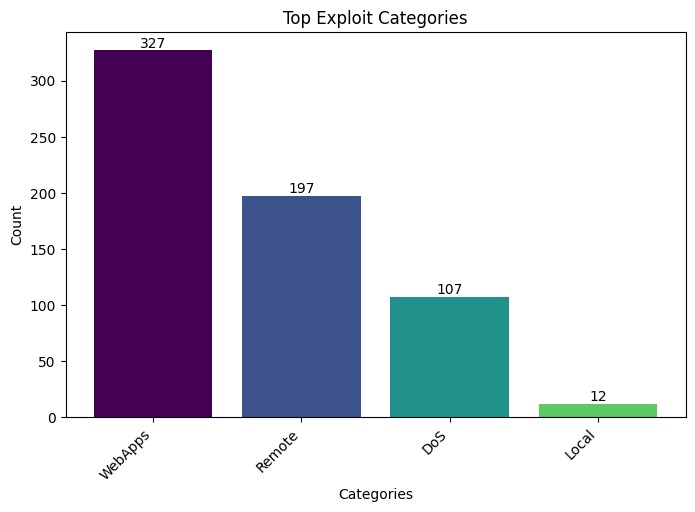

In [10]:
# Unique colors for each bar
category_colors = plt.cm.viridis([i / len(category_counts[:10]) for i in range(len(category_counts[:10]))])

# Plot for categories
plt.figure(figsize=(8, 5))
bars = plt.bar(category_counts.index[:10], category_counts.values[:10], color=category_colors)

# Add total count on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.title("Top Exploit Categories")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


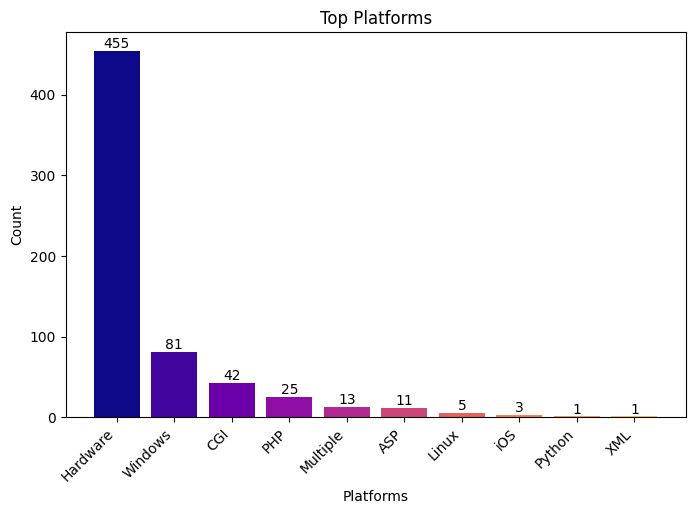

In [11]:
# Unique colors for each bar
platform_colors = plt.cm.plasma([i / len(platform_counts[:10]) for i in range(len(platform_counts[:10]))])

# Plot for platforms
plt.figure(figsize=(8, 5))
bars = plt.bar(platform_counts.index[:10], platform_counts.values[:10], color=platform_colors)

# Add total count on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.title("Top Platforms")
plt.xlabel("Platforms")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


In [12]:
# Filtering data for device-specific analysis
devices_keywords = ['camera', 'switch', 'router', 'nvr']
device_data = df[df['description'].str.contains('|'.join(devices_keywords), case=False, na=False)]

# Device-specific distribution
device_distribution = device_data['description'].str.extract(f"({'|'.join(devices_keywords)})", expand=False).value_counts()

# Display results
category_counts.head(10), platform_counts.head(10), device_distribution



# Plotting device-specific analysis
device_distribution_full = device_distribution.reindex(['router', 'switch', 'camera', 'nvr'], fill_value=0)

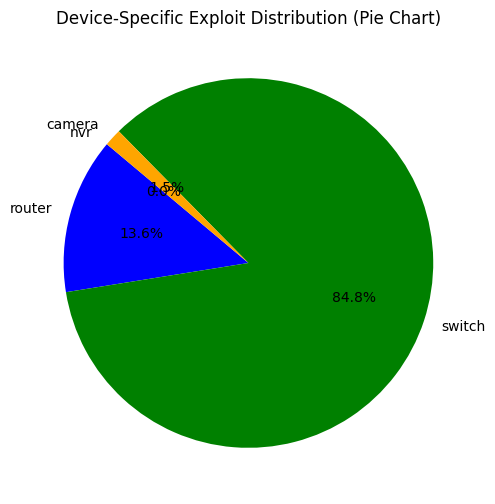

In [13]:
# Creating a pie chart for device-specific exploit distribution
plt.figure(figsize=(6, 6))
plt.pie(
    device_distribution_full.values, 
    labels=device_distribution_full.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['blue', 'green', 'orange', 'red']
)
plt.title("Device-Specific Exploit Distribution (Pie Chart)")
plt.show()
